# Encuentra los parametros cosmologicos cond datos de supernovas

In [25]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import math
import random
plt.style.use('classic')

Populating the interactive namespace from numpy and matplotlib


/home/luiscantero/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['cov', 'var', 'plt', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [26]:
z1=np.loadtxt('jla_mub_covmatrix.dat')  # Abrimos los archivos que contienen los datos
mu1=np.loadtxt('jla_mub.txt') 
covmatrix=mu1[:,0]
z=mu1[:,0]
mu=mu1[:,1]

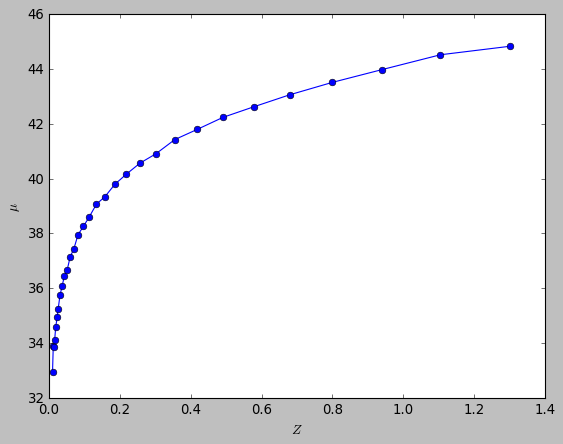

In [27]:
# Graficamos los datos
plt.plot(z,mu,'bo', linestyle='-')
plt.xlabel("$Z$")
plt.ylabel("$\mu$")
plt.show()

In [30]:
cov=np.zeros((31, 31))
for i in range(31):
    for j in range(31):
        cov[i][j]=covmatrix[i]

In [31]:
var=np.zeros(31)
for i in range(31):
    var[i]=cov[i][i]

### Usamos la funcion Likelihood

In [124]:
def likelihood(H, om, z, y, var):
    tam = np.size(var)
    c = 3 * 10 ** 8
    s3 = (1.0-om)/om
    suma = 0
    lh = np.zeros(tam)
    for i in range(tam):
        a = 1/(1+z[i])
        eta1 = (2.0*math.sqrt(s3+1)*((1**-4)-0.1540*(s3**1/3)*(1**-3)+0.4304*(s3**2/3)+0.19097*s3*1**-1+0.066941*(s3**4/3)))**(-1/8)
        eta2 = (2.0*math.sqrt(s3+1)*((a**-4)-0.1540*(s3**1/3)*(a**-3)+0.4304*(s3**2/3)+0.19097*s3*a**-1+0.066941*(s3**4/3)))**(-1/8)
        distancia = (c/H)*(1+z[i])*(eta1-eta2)
        x = 25 - 5 * math.log10(H / 100.0) + 5 * math.log10(distancia)
        suma = suma + (y[i] - x) / (var[i]) ** 2
        lh[i] = suma / 2.0
    return lh[tam - 1]

In [136]:
#Vectores iniciales del método iterativo
H0 = 50 #random.uniform(50, 100)
om0 = 0.5 #np.random.rand()
H1 = 55 #random.uniform(50, 100)
om1 = 0.6 #np.random.rand()
y0 = likelihood(H0,om0,z,mud,var)
y1 = likelihood(H1,om1,z,mud,var)

p  = 100 #Numero de pasos maximo
x1 = np.zeros(p)# Aqui se guardan los valores obtenidos
x2 = np.zeros(p)
pasos = np.zeros(p)
x1[0] = H1
x2[0] = om1

for i in range(1,p):
    pasos[i] = i
    error = abs(math.log10(abs(y1)) - math.log10(abs(y0)))
    if(-math.log10(abs(y1)) > math.log10(abs(y0))): #Condicion para aceptar los valores de Ho y Omega 
        H0 = H1
        om0 = om1
        y0 = likelihood(H0,om0,z,mud,var)
        x1[i] = H0
        x2[i] = om0
        H1 = random.uniform(50,100)
        om1 = np.random.rand()
        y1 = likelihood(H1,om1,z,mud,var)
    else:
        prob = np.random.rand()
        diferencia = - math.log10(abs(y1))-(-math.log10(abs(y0)))
        if diferencia > math.log10(prob):
            H0 = H1
            om0 = om1
            y0 = likelihood(H0,om0,z,mud,var)
            x1[i] = H0
            x2[i] = om0
            H1 = random.uniform(50,100)
            om1 = np.random.rand()
            y1 = likelihood(H1,om1,z,mud,var)
        else:
            H0 = H0
            om0 = om0


Ho:  87.74250351719706 ; Omega:  0.9668517330306252


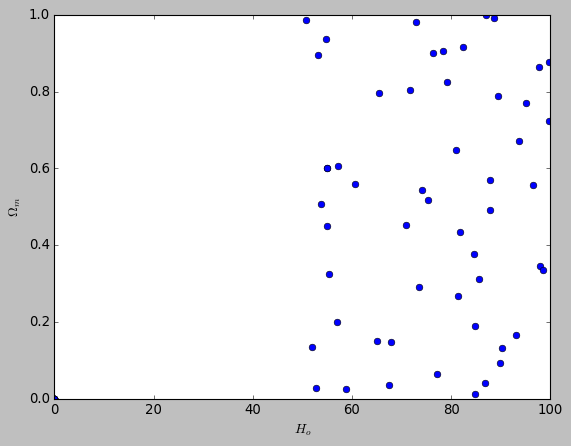

In [137]:
# Graficamos la trayectoria del Likelihood
print('Ho: ',H1, '; Omega: ',om1)
plt.plot(x1,x2,'bo')
plt.xlabel("$H_{o}$")
plt.ylabel("$\Omega_{m}$")
plt.autoscale()
plt.show()

In [138]:
y1

-234315.79608653847